In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import pandas as pd
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve, roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns

In [0]:
cd drive/My\ Drive/CS4774

/content/drive/My Drive/CS4774


In [0]:
cd_categorical = pd.read_csv('clean_data_5class.csv')

In [0]:
cd_binary = pd.read_csv('clean_data.csv')

In [184]:
cd_binary.Ped_Nonped.sum()

11769

In [185]:
cd_binary.shape

(893663, 231)

In [186]:
cd_binary.columns[0:20]

Index(['Unnamed: 0', 'Fatal_Crashes', 'Injury', 'School_Zone', 'Ped_Nonped',
       'Bike_Nonbike', 'Speed_Notspeed', 'Belted_Unbelted',
       'Alcohol_Notalcohol', 'Distracted_Notdistracted', 'Senior_Notsenior',
       'Young_Notyoung', 'Deer_Nodeer', 'Collision_Type_1. Rear End',
       'Collision_Type_10. Deer', 'Collision_Type_11. Other Animal',
       'Collision_Type_12. Ped', 'Collision_Type_13. Bicyclist',
       'Collision_Type_14. Motorcyclist', 'Collision_Type_15. Backed Into'],
      dtype='object')

In [0]:
l = cd_binary.shape[0]

In [188]:
cd_binary.Injury.sum() / l

0.34392718507983433

In [0]:
def prop_injury(df, x):
  t = df[df[x]== 1]
  return (t.shape[0], t.Injury.sum() / t.shape[0])

In [190]:
props = []
for i in cd_binary.columns:
  props.append((i, prop_injury(cd_binary, i)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
props.sort(key = lambda x: x[1][1])

In [192]:
for i in props:
  print(i)

('Unnamed: 0', (1, 0.0))
('Collision_Type_Not Applicable', (2, 0.0))
('Roadway_Surface_Cond_Not Applicable', (1, 0.0))
('Weather_Condition_Not Applicable', (2, 0.0))
('Light_Condition_7. Unknown', (1501, 0.06928714190539641))
('Collision_Type_10. Deer', (41462, 0.07920505523129613))
('Crash_Event_Type_Dsc_23. Animal', (44820, 0.08340026773761713))
('Deer_Nodeer', (55246, 0.12748434275784673))
('Collision_Type_11. Other Animal', (3303, 0.1516802906448683))
('Crash_Event_Type_Dsc_34. Separation of Units', (85, 0.15294117647058825))
('Crash_Event_Type_Dsc_29. Jack Knife', (302, 0.15562913907284767))
('Collision_Type_15. Backed Into', (5868, 0.1716087252897069))
('Collision_Type_4. Sideswipe - Same Direction', (65806, 0.1940552533203659))
('Crash_Event_Type_Dsc_6. Parked Vehicle', (23313, 0.1974434864667782))
('Collision_Type_Not Provided', (5, 0.2))
('Driver_Action_Type_Cd_14. Improper Turn - Wide Right Turn', (834, 0.20623501199040767))
('Driver_Action_Type_Cd_15. Improper Turn - Cut Cor

In [0]:
cd_binary = cd_binary.drop('Unnamed: 0', axis=1)

In [194]:
props[211:230]

[('Vehicle_Body_Type_Cd_19. Special Vehicle - ATV', (213, 0.9295774647887324)),
 ('Crash_Event_Type_Dsc_39. Fell/Jumped From Vehicle',
  (1118, 0.9391771019677997)),
 ('Vehicle_Body_Type_Cd_10. Moped', (2130, 0.9436619718309859)),
 ('Bike_Nonbike', (4790, 0.9651356993736951)),
 ('Crash_Event_Type_Dsc_22. Bicycle', (3440, 0.9688953488372093)),
 ('Vehicle_Body_Type_Cd_9. Bicycle', (3277, 0.969179127250534)),
 ('Collision_Type_14. Motorcyclist', (85, 0.9764705882352941)),
 ('Collision_Type_13. Bicyclist', (163, 0.9938650306748467)),
 ('Crash_Event_Type_Dsc_19. Ped', (10641, 0.9938915515459074)),
 ('Collision_Type_12. Ped', (10553, 0.9985786032407846)),
 ('Ped_Nonped', (11769, 0.99940521709576)),
 ('Fatal_Crashes', (5172, 1.0)),
 ('Injury', (307355, 1.0)),
 ('Crash_Event_Type_Dsc_Not Provided', (1, 1.0)),
 ('Driverage', (0, nan)),
 ('Carspeedlimit', (0, nan)),
 ('LATITUDE', (0, nan)),
 ('LONGITUDE', (0, nan)),
 ('Physical_Juris', (0, nan))]

In [195]:
props[4:12]

[('Light_Condition_7. Unknown', (1501, 0.06928714190539641)),
 ('Collision_Type_10. Deer', (41462, 0.07920505523129613)),
 ('Crash_Event_Type_Dsc_23. Animal', (44820, 0.08340026773761713)),
 ('Deer_Nodeer', (55246, 0.12748434275784673)),
 ('Collision_Type_11. Other Animal', (3303, 0.1516802906448683)),
 ('Crash_Event_Type_Dsc_34. Separation of Units', (85, 0.15294117647058825)),
 ('Crash_Event_Type_Dsc_29. Jack Knife', (302, 0.15562913907284767)),
 ('Collision_Type_15. Backed Into', (5868, 0.1716087252897069))]

In [0]:
keep = []
for i in props[4:12]:
  keep.append(i[0])
for i in props[205:]:
  keep.append(i[0])

In [197]:
keep[0]

'Light_Condition_7. Unknown'

In [0]:
cd_b2 = cd_binary[keep]

In [0]:
cd_b2 = cd_b2.drop(['Physical_Juris', 'PLAN_DISTRICT'], axis=1)

In [0]:
cd_b2 = cd_b2[cd_b2['LATITUDE'] != 0]

In [0]:
cd_Injuries = cd_b2[cd_b2['Injury'] == 1]

In [0]:
cd_nonInjuries = cd_b2[cd_b2['Injury'] == 0].sample(cd_Injuries.shape[0])

In [0]:
cd_b3 = pd.concat([cd_Injuries, cd_nonInjuries])

In [0]:
Injury = cd_b3.Injury

In [0]:
cd_b3 = cd_b3.drop(['Fatal_Crashes', 'Injury'], axis=1)

In [0]:
#cd_b3 = cd_b3[['Ped_Nonped']]

In [206]:
cd_b3.columns

Index(['Light_Condition_7. Unknown', 'Collision_Type_10. Deer',
       'Crash_Event_Type_Dsc_23. Animal', 'Deer_Nodeer',
       'Collision_Type_11. Other Animal',
       'Crash_Event_Type_Dsc_34. Separation of Units',
       'Crash_Event_Type_Dsc_29. Jack Knife', 'Collision_Type_15. Backed Into',
       'Driver_Action_Type_Cd_28. Driving Without Lights',
       'Crash_Event_Type_Dsc_42. Other Non-Collision',
       'Crash_Event_Type_Dsc_41. Non-Collision Unknown',
       'Driver_Action_Type_Cd_30. Avoiding Ped', 'Belted_Unbelted',
       'Vehicle_Body_Type_Cd_11. Motorcycle',
       'Vehicle_Body_Type_Cd_19. Special Vehicle - ATV',
       'Crash_Event_Type_Dsc_39. Fell/Jumped From Vehicle',
       'Vehicle_Body_Type_Cd_10. Moped', 'Bike_Nonbike',
       'Crash_Event_Type_Dsc_22. Bicycle', 'Vehicle_Body_Type_Cd_9. Bicycle',
       'Collision_Type_14. Motorcyclist', 'Collision_Type_13. Bicyclist',
       'Crash_Event_Type_Dsc_19. Ped', 'Collision_Type_12. Ped', 'Ped_Nonped',
       'Cras

In [0]:
normalizecol = [ 'Carspeedlimit','LATITUDE', 'LONGITUDE']

In [0]:
from sklearn.preprocessing import normalize
for i in range(len(normalizecol)):
  tonorm = cd_b3[normalizecol[i]].to_numpy()
  cd_b3[normalizecol[i]] = (tonorm-tonorm.mean())/tonorm.std()

In [0]:
crashes_prepared = cd_b3.to_numpy()

In [0]:
InjuryCat = pd.get_dummies(Injury)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(crashes_prepared, np.asarray(Injury), random_state=42, shuffle= True)
X_train_network, X_val_network, y_train_network, y_val_network = train_test_split(X_train, y_train, random_state=42, train_size = 0.75, shuffle = True)

In [213]:
print(cd_b3.columns)

Index(['Light_Condition_7. Unknown', 'Collision_Type_10. Deer',
       'Crash_Event_Type_Dsc_23. Animal', 'Deer_Nodeer',
       'Collision_Type_11. Other Animal',
       'Crash_Event_Type_Dsc_34. Separation of Units',
       'Crash_Event_Type_Dsc_29. Jack Knife', 'Collision_Type_15. Backed Into',
       'Driver_Action_Type_Cd_28. Driving Without Lights',
       'Crash_Event_Type_Dsc_42. Other Non-Collision',
       'Crash_Event_Type_Dsc_41. Non-Collision Unknown',
       'Driver_Action_Type_Cd_30. Avoiding Ped', 'Belted_Unbelted',
       'Vehicle_Body_Type_Cd_11. Motorcycle',
       'Vehicle_Body_Type_Cd_19. Special Vehicle - ATV',
       'Crash_Event_Type_Dsc_39. Fell/Jumped From Vehicle',
       'Vehicle_Body_Type_Cd_10. Moped', 'Bike_Nonbike',
       'Crash_Event_Type_Dsc_22. Bicycle', 'Vehicle_Body_Type_Cd_9. Bicycle',
       'Collision_Type_14. Motorcyclist', 'Collision_Type_13. Bicyclist',
       'Crash_Event_Type_Dsc_19. Ped', 'Collision_Type_12. Ped', 'Ped_Nonped',
       'Cras

In [214]:
cd_b3.shape

(614708, 30)

In [0]:
#lat=28, long=29

In [0]:
from matplotlib import cm as cm
import matplotlib.image as mpimg

def plotclusters(X, Y, k, model, name):
  virginia_img=mpimg.imread('Virginia-Outline.png')
  #plt.imshow(virginia_img, alpha=0.5, cmap=plt.get_cmap("jet"), extent=[X[29].min()-3.8, X[29].max()+.15, X[28].min()-.525, X[28].max()+1.2]) #-3.8, X[1].max()+0.15, X[0].min()-0.525, X[0].max()+1.2
  colors = ['c', 'g', 'r']#cm.rainbow(np.linspace(0, 1, k))
  for classification in range(k):
    c = colors[classification]
    string_label = str('cluster ' + str(classification))
    plt.scatter(X[y_km == classification, 29], X[y_km == classification, 28], 
                color = c, s = 10, alpha = 0.5, label = string_label)
  plt.scatter(model.cluster_centers_[:,29], model.cluster_centers_[:,28], color='k', marker = "*", 
              s= 100, label='centroids')
  #The +7 is from 18-4-7, in case the passthrough option is putting the lat&long after the passthroughs
  plt.legend(scatterpoints=1)
  plt.grid()
  plt.show()
  save_fig(name)
  return

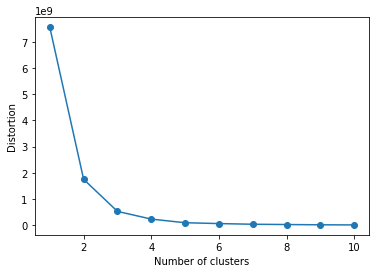

Saving figure K-Means Elbow Curve


<Figure size 432x288 with 0 Axes>

In [228]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_jobs = -1, random_state=42)
    km.fit(crashes_prepared)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
save_fig("K-Means Elbow Curve")

In [0]:
from matplotlib import pyplot as plt


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  #path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  #plt.savefig(format=fig_extension, dpi=resolution)

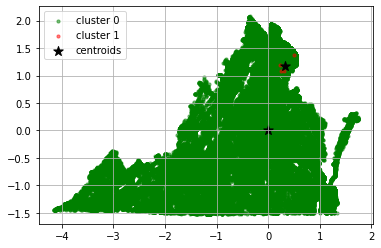

Saving figure 2-Means


<Figure size 432x288 with 0 Axes>

In [247]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, n_jobs = -1, random_state=42)
km.fit(crashes_prepared)
y_km = km.fit_predict(crashes_prepared)
plotclusters(crashes_prepared, y_km, 2, km, "2-Means")

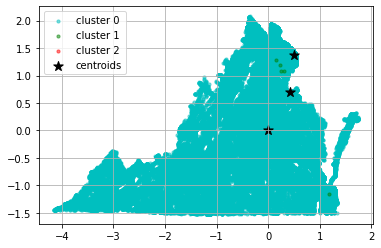

Saving figure 3-Means


<Figure size 432x288 with 0 Axes>

In [249]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, n_jobs = -1, random_state=42)
km.fit(crashes_prepared)
y_km = km.fit_predict(crashes_prepared)
plotclusters(crashes_prepared, y_km, 3, km, "3-Means")

In [0]:
model = keras.Sequential()
#model.add(keras.layers.Flatten(input_shape = [len(X_train[0])]))
model.add(keras.layers.Dense(250, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(130, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(90, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(2, activation='softmax'))
model.add(keras.layers.Reshape([2]))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])

In [0]:
def createprobabilities(array):
  resultarray = []
  for i in range(len(array)):
    if(array[i]==1):
      resultarray.append([0,1])
    else:
      resultarray.append([1,0])
  return np.asarray(resultarray)

In [0]:
y_train_net_prob = createprobabilities(y_train_network)
y_val_net_prob = createprobabilities(y_val_network)

In [0]:
model.fit(X_train_network, y_train_net_prob, batch_size=300, epochs = 60,
          validation_data=(X_val_network, y_val_net_prob))

Epoch 1/60
1153/1153 [==============================] - 10s 9ms/step - loss: 0.6777 - accuracy: 0.5453 - recall: 0.5453 - precision: 0.5453 - val_loss: 0.6445 - val_accuracy: 0.5744 - val_recall: 0.5744 - val_precision: 0.5744
Epoch 2/60
1153/1153 [==============================] - 9s 8ms/step - loss: 0.6420 - accuracy: 0.5792 - recall: 0.5792 - precision: 0.5792 - val_loss: 0.6377 - val_accuracy: 0.5839 - val_recall: 0.5839 - val_precision: 0.5839
Epoch 3/60
1153/1153 [==============================] - 9s 8ms/step - loss: 0.6401 - accuracy: 0.5827 - recall: 0.5827 - precision: 0.5827 - val_loss: 0.6378 - val_accuracy: 0.5862 - val_recall: 0.5862 - val_precision: 0.5862
Epoch 4/60
1153/1153 [==============================] - 10s 8ms/step - loss: 0.6392 - accuracy: 0.5844 - recall: 0.5844 - precision: 0.5844 - val_loss: 0.6407 - val_accuracy: 0.5787 - val_recall: 0.5787 - val_precision: 0.5787
Epoch 5/60
1153/1153 [==============================] - 9s 8ms/step - loss: 0.6388 - accuracy:

In [0]:
model.fit(X_train_network, y_train_net_prob, epochs = 100000, steps_per_epoch = 10*len(X_train[0]), validation_steps = 3*len(X_train[0]),
          validation_data=(X_val_network, y_val_net_prob))

Epoch 1/100000
300/300 [==============================] - 6s 21ms/step - loss: 0.6242 - accuracy: 0.6199 - recall: 0.6199 - precision: 0.6199 - val_loss: 0.6282 - val_accuracy: 0.6188 - val_recall: 0.6188 - val_precision: 0.6188
Epoch 2/100000
300/300 [==============================] - 6s 21ms/step - loss: 0.6240 - accuracy: 0.6199 - recall: 0.6199 - precision: 0.6199 - val_loss: 0.6284 - val_accuracy: 0.6178 - val_recall: 0.6178 - val_precision: 0.6178
Epoch 3/100000
300/300 [==============================] - 6s 21ms/step - loss: 0.6236 - accuracy: 0.6194 - recall: 0.6194 - precision: 0.6194 - val_loss: 0.6283 - val_accuracy: 0.6180 - val_recall: 0.6180 - val_precision: 0.6180
Epoch 4/100000
300/300 [==============================] - 6s 22ms/step - loss: 0.6241 - accuracy: 0.6197 - recall: 0.6197 - precision: 0.6197 - val_loss: 0.6285 - val_accuracy: 0.6192 - val_recall: 0.6192 - val_precision: 0.6192
Epoch 5/100000
300/300 [==============================] - 7s 22ms/step - loss: 0.623

KeyboardInterrupt: ignored

In [0]:
injuries_pred_unfiltered = model.predict(X_test)
injuries_pred = np.argmax(injuries_pred_unfiltered, axis = 1)

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, injuries_pred)

array([[53694, 23335],
       [35695, 40954]])

# Linear Regression


In [0]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
reg.score(X_test, y_test)

0.09789128186604135